In this notebook we visualize our data. Our main objective is to gain insights to facilitate the task of classifying different start types.

# Setup

In [1]:
#Imports
import numpy as np                    # Numerical operations
import pandas as pd                   # Data manipulation
from matplotlib import pyplot as plt  # Basic plotting
import seaborn as sns                 # Statistical visualizations
import scipy.stats as stats           # statistical distributions

#Path setup
import os                             # Operating system utilities
from pathlib import Path              # Object-oriented filesystem paths
notebook_path = Path().absolute()     # Current notebook location
project_root = notebook_path.parent   # Project root directory

# 1. Importing the Data

In [2]:
# reading the data from the gold layer
dfG = pd.read_csv(project_root/'data'/'gold'/'starG.csv')
dfG

,identifier,class,full_class,effective_temperature,log_surface_gravity,metallicity_fe_h,radial_velocity,redshift
0,300702165|2015/01/19,K,K4,4729.36,4.741,-0.128,42.15,0.000141
1,215109|2011/10/23,G,G8,4642.57,4.662,-0.363,36.61,0.000122
2,18112111|2011/12/18,K,K3,4664.49,4.690,-0.207,35.04,0.000117
3,367412199|2015/10/07,G,G9,4960.44,4.613,-0.262,-35.46,-0.000118
4,18112179|2011/12/18,G,G8,5371.04,4.296,-0.248,-29.91,-0.000100
...,...,...,...,...,...,...,...,...
49995,686002046|2018/10/30,F,F2,6061.88,3.811,-0.240,9.94,0.000033
49996,381902037|2015/11/02,F,F2,6033.30,4.190,-0.458,35.12,0.000117
49997,381902043|2015/11/02,G,G9,5066.79,3.210,-0.247,-26.94,-0.000090
49998,254204018|2014/10/14,G,G7,5571.65,4.073,0.435,1.68,0.000006


Our main objective is to classify the class and subclass of stars. That said, it is convenient to check the number of elements per class.

In [3]:
print( 'Different Classes:' + str( dfG['class'].unique() ) )
print( 'Different SubClasses:' + str( dfG['full_class'].unique() ) )
#print( 'Different Luminosity Classes:' + str( dfG['luminosity_class'].unique() ) )

Different Classes:['K' 'G' 'F' 'A']
Different SubClasses:['K4' 'G8' 'K3' 'G9' 'G6' 'F4' 'F0' 'F9' 'F8' 'G2' 'K0' 'K1' 'G4' 'G3'
 'G1' 'K5' 'G5' 'G7' 'F6' 'F7' 'K7' 'F2' 'G0' 'F5' 'F3' 'A5V' 'K2' 'A7V'
 'A6IV' 'A7IV' 'A9V' 'A1V' 'A8III' 'A7III' 'A2V' 'A3IV' 'A1IV']


In [4]:
print( 'Number of Class: ' + str(dfG['class'].nunique() ) )
#print( 'Number of Sub Classes: ' + str(dfG['subclass'].nunique() ) )
#print( 'Number of Luminosity Classes: ' + str(dfG['luminosity_class'].nunique() ) )
print( 'Number of Full Classes: ' + str(dfG['full_class'].nunique() ) )

Number of Class: 4
Number of Full Classes: 37


A concern is the fact that the data contains missing valeus. After dropping the missing values, the number count of classes is given by:

In [5]:
# Class statistics
print(f"Unique Classes: {dfG['class'].nunique()}")
#print(f"Unique Subclasses: {dfG['subclass'].nunique()}")
#print(f"Unique Luminosity Classes: {dfG['luminosity_class'].nunique()}")
print(f"Unique Full Classes: {dfG['full_class'].nunique()}")

# Missing value analysis for subclass vs effective_temperature_2
print("\nSUBCLASS vs EFFECTIVE_TEMPERATURE_2:")
for val in dfG['full_class'].dropna().unique():
    val_mask = dfG['full_class'] == val
    val_count = val_mask.sum()
    temp2_na = dfG.loc[val_mask, 'effective_temperature'].isna().sum()
    print(f"'{val}': {temp2_na/val_count:.1%} missing temp2 ({temp2_na} of {val_count})")

# Missing value analysis for luminosity_class vs visual_magnitude  
# print("\nLUMINOSITY_CLASS vs VISUAL_MAGNITUDE:")
# for val in dfG['luminosity_class'].dropna().unique():
#     val_mask = dfG['luminosity_class'] == val
#     val_count = val_mask.sum()
#     mag_na = dfG.loc[val_mask, 'visual_magnitude'].isna().sum()
#     print(f"'{val}': {mag_na/val_count:.1%} missing mag ({mag_na} of {val_count})")

Unique Classes: 4
Unique Full Classes: 37

SUBCLASS vs EFFECTIVE_TEMPERATURE_2:
'K4': 0.0% missing temp2 (0 of 886)
'G8': 0.0% missing temp2 (0 of 3059)
'K3': 0.0% missing temp2 (0 of 2371)
'G9': 0.0% missing temp2 (0 of 1347)
'G6': 0.0% missing temp2 (0 of 1289)
'F4': 0.0% missing temp2 (0 of 230)
'F0': 0.0% missing temp2 (0 of 1465)
'F9': 0.0% missing temp2 (0 of 3097)
'F8': 0.0% missing temp2 (0 of 414)
'G2': 0.0% missing temp2 (0 of 3846)
'K0': 0.0% missing temp2 (0 of 807)
'K1': 0.0% missing temp2 (0 of 1482)
'G4': 0.0% missing temp2 (0 of 1391)
'G3': 0.0% missing temp2 (0 of 5375)
'G1': 0.0% missing temp2 (0 of 669)
'K5': 0.0% missing temp2 (0 of 3813)
'G5': 0.0% missing temp2 (0 of 2911)
'G7': 0.0% missing temp2 (0 of 3374)
'F6': 0.0% missing temp2 (0 of 1355)
'F7': 0.0% missing temp2 (0 of 1857)
'K7': 0.0% missing temp2 (0 of 2146)
'F2': 0.0% missing temp2 (0 of 1712)
'G0': 0.0% missing temp2 (0 of 1872)
'F5': 0.0% missing temp2 (0 of 2638)
'F3': 0.0% missing temp2 (0 of 268)
'

In [6]:
# # Subclass analysis (including missing values)
# subclass_values = dfG['subclass'].unique()
# n_subclasses = len(subclass_values)
# n_rows = (n_subclasses + 1) // 2

# fig1, axes1 = plt.subplots(n_rows, 2, figsize=(15, 5*n_rows))
# axes1 = axes1.flatten()

# for i, val in enumerate(subclass_values):
#     count = (dfG['subclass'] == val).sum()
#     valid = count - dfG[dfG['subclass']==val]['effective_temperature_2'].isna().sum()
    
#     if pd.isna(val):
#         val_label = 'Missing'
#     else:
#         val_label = str(val)
    
#     axes1[i].pie(
#         [valid, count-valid],
#         labels=['Valid', 'Missing'],
#         colors=['blue', 'red'],
#         autopct='%1.1f%%'
#     )
#     axes1[i].set_title(f"Subclass: {val_label}\n(n={count})")

# for j in range(i+1, len(axes1)):
#     axes1[j].axis('off')
# plt.show()
# # Luminosity class analysis (excluding missing values)
# lum_values = dfG['luminosity_class'].dropna().unique()

# print('____________________________________________________________________________________________________________________________________________')

# fig2, axes2 = plt.subplots(1, len(lum_values), figsize=(15, 5))
# if len(lum_values) == 1:  # Handle single plot case
#     axes2 = [axes2]

# for i, val in enumerate(lum_values):
#     count = (dfG['luminosity_class'] == val).sum()
#     valid = count - dfG[dfG['luminosity_class']==val]['visual_magnitude'].isna().sum()
    
#     axes2[i].pie(
#         [valid, count-valid],
#         labels=['Valid', 'Missing'],
#         colors=['blue', 'red'],
#         autopct='%1.1f%%'
#     )
#     axes2[i].set_title(f"Lum Class: {val}\n(n={count})")

# plt.tight_layout()
# plt.show()

Now, it is also convenient to analyze the percentage of each category in our dataset.

Number of Class: 4
Number of SubClasses: 37
Index(['G', 'F', 'K', 'A'], dtype='object', name='class')


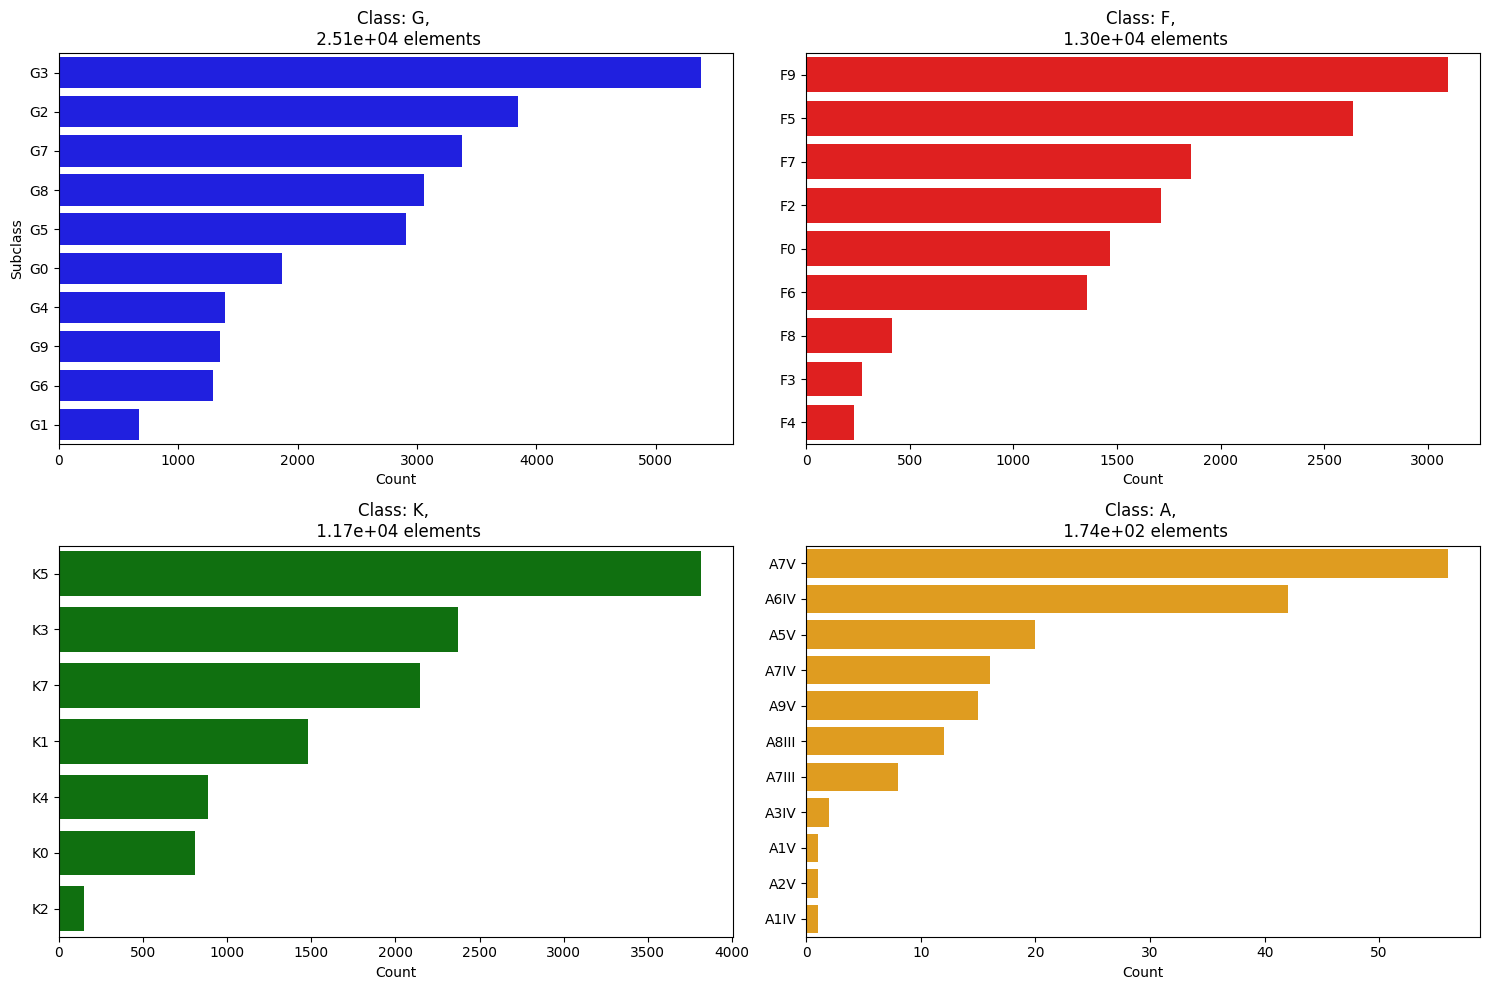

In [7]:
# Print basic counts
print('Number of Class:', dfG['class'].nunique())
#print('Number of Sub Classes:', dfG['subclass'].nunique())
#print('Number of Luminosity Classes:', dfG['luminosity_class'].nunique())
print('Number of SubClasses:', dfG['full_class'].nunique())

# Get top 2 classes
top_classes = dfG['class'].value_counts().index

print(top_classes)

# Create figure with 2 rows (subclasses and luminosity) and 2 columns (one per class)
plt.figure(figsize=(15, 10))

# First row: Subclass distributions
for i, class_name in enumerate(top_classes, 1):
    plt.subplot(2, 2, i)
    class_data = dfG[dfG['class'] == class_name]
    sns.countplot(data=class_data, y='full_class',
                 order=class_data['full_class'].value_counts().index,
                 color=['blue', 'red', 'green', 'orange'][i-1])
    plt.title(f'Class: {class_name}, \n {len(class_data):.2e} elements')
    plt.xlabel('Count')
    plt.ylabel('Subclass' if i == 1 else '')

# Second row: Luminosity class distributions
# for i, class_name in enumerate(top_classes, 3):
#     plt.subplot(2, 2, i)
#     class_data = dfG[dfG['class'] == class_name]
#     sns.countplot(data=class_data, y='luminosity_class',
#                  order=class_data['luminosity_class'].value_counts().index,
#                  color=['blue', 'red'][i-3], alpha=0.7)
#     plt.title(f'Luminosity Class Distribution\nClass: {class_name}')
#     plt.xlabel('Count')
#     plt.ylabel('Luminosity Class' if i == 3 else '')

plt.tight_layout()
plt.show()

Number of Classes: 4
Number of SubClasses: 37
Index(['G', 'F', 'K', 'A'], dtype='object', name='class')


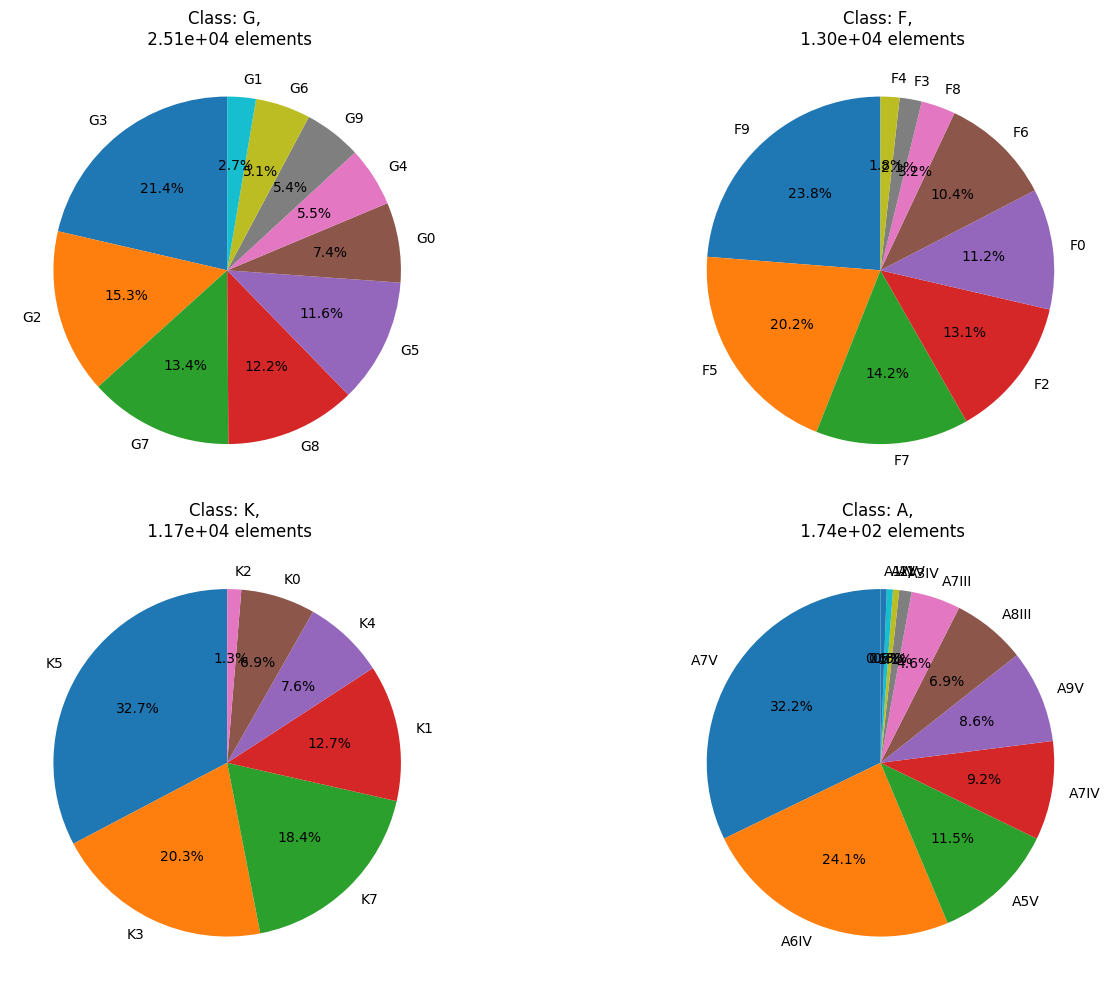

In [8]:
# Print basic counts
print('Number of Classes:', dfG['class'].nunique())
print('Number of SubClasses:', dfG['full_class'].nunique())

# Get top 2 classes
top_classes = dfG['class'].value_counts().index
print(top_classes)

# Create figure with 2 rows (subclasses) and 2 columns (one per class)
plt.figure(figsize=(15, 10))

# First row: Subclass distributions as pie charts
for i, class_name in enumerate(top_classes, 1):
    plt.subplot(2, 2, i)
    class_data = dfG[dfG['class'] == class_name]
    subclass_counts = class_data['full_class'].value_counts()
    plt.pie(subclass_counts, labels=subclass_counts.index, autopct='%1.1f%%', startangle=90)
    plt.title(f'Class: {class_name}, \n {len(class_data):.2e} elements')

plt.tight_layout()
plt.show()

# 2. Features and Correlations

We now turn to analyze the correlation matrix to study the relations between the different features of our data. Our main aim is to understand the most important features for the later classification training. We begin by dropping the non-numerical features and encoding the categorical labels. Note that we perform said analysis in separate for the temperature and luminosity classes, for 

In [9]:
# convert categorical columns
df_numeric = dfG.drop(['identifier'], axis=1).copy().dropna()    # Drop non-numeric columns and NA values
df_numeric['class'] = dfG['class'].astype('category').cat.codes                                # Encode class
df_numeric['full_class'] = dfG['full_class'].str[0:].astype('category').cat.codes              # Encode full_class

df_numeric  # displays the transformed dataframe

,class,full_class,effective_temperature,log_surface_gravity,metallicity_fe_h,radial_velocity,redshift
0,3,34,4729.36,4.741,-0.128,42.15,0.000141
1,2,28,4642.57,4.662,-0.363,36.61,0.000122
2,3,33,4664.49,4.690,-0.207,35.04,0.000117
3,2,29,4960.44,4.613,-0.262,-35.46,-0.000118
4,2,28,5371.04,4.296,-0.248,-29.91,-0.000100
...,...,...,...,...,...,...,...
49995,1,12,6061.88,3.811,-0.240,9.94,0.000033
49996,1,12,6033.30,4.190,-0.458,35.12,0.000117
49997,2,29,5066.79,3.210,-0.247,-26.94,-0.000090
49998,2,27,5571.65,4.073,0.435,1.68,0.000006


We now compute and visualize the correlation and covariance matrices.

In [10]:
# correlation matrix
corr_matrix = df_numeric.corr()
corr_matrix

,class,full_class,effective_temperature,log_surface_gravity,metallicity_fe_h,radial_velocity,redshift
class,1.000000,0.933188,-0.808118,0.236770,0.161355,0.014735,0.014735
full_class,0.933188,1.000000,-0.894687,0.256804,0.204965,0.019562,0.019562
effective_temperature,-0.808118,-0.894687,1.000000,-0.024884,-0.011418,0.023913,0.023913
log_surface_gravity,0.236770,0.256804,-0.024884,1.000000,0.213478,0.121239,0.121239
metallicity_fe_h,0.161355,0.204965,-0.011418,0.213478,1.000000,0.130585,0.130585
radial_velocity,0.014735,0.019562,0.023913,0.121239,0.130585,1.000000,1.000000
redshift,0.014735,0.019562,0.023913,0.121239,0.130585,1.000000,1.000000


In [11]:
# Compute covariance matrix
cov_matrix = df_numeric.cov()
cov_matrix

,class,full_class,effective_temperature,log_surface_gravity,metallicity_fe_h,radial_velocity,redshift
class,0.506597,4.623737,-374.710486,0.094081,0.041735,0.485947,1.620945e-06
full_class,4.623737,48.460229,-4057.458011,0.998024,0.518509,6.309716,2.104695e-05
effective_temperature,-374.710486,-4057.458011,424404.418627,-9.050034,-2.703020,721.830492,2.407767e-03
log_surface_gravity,0.094081,0.998024,-9.050034,0.311668,0.043309,3.136199,1.046123e-05
metallicity_fe_h,0.041735,0.518509,-2.703020,0.043309,0.132058,2.198828,7.334501e-06
radial_velocity,0.485947,6.309716,721.830492,3.136199,2.198828,2146.988457,7.161583e-03
redshift,0.000002,0.000021,0.002408,0.000010,0.000007,0.007162,2.388847e-08


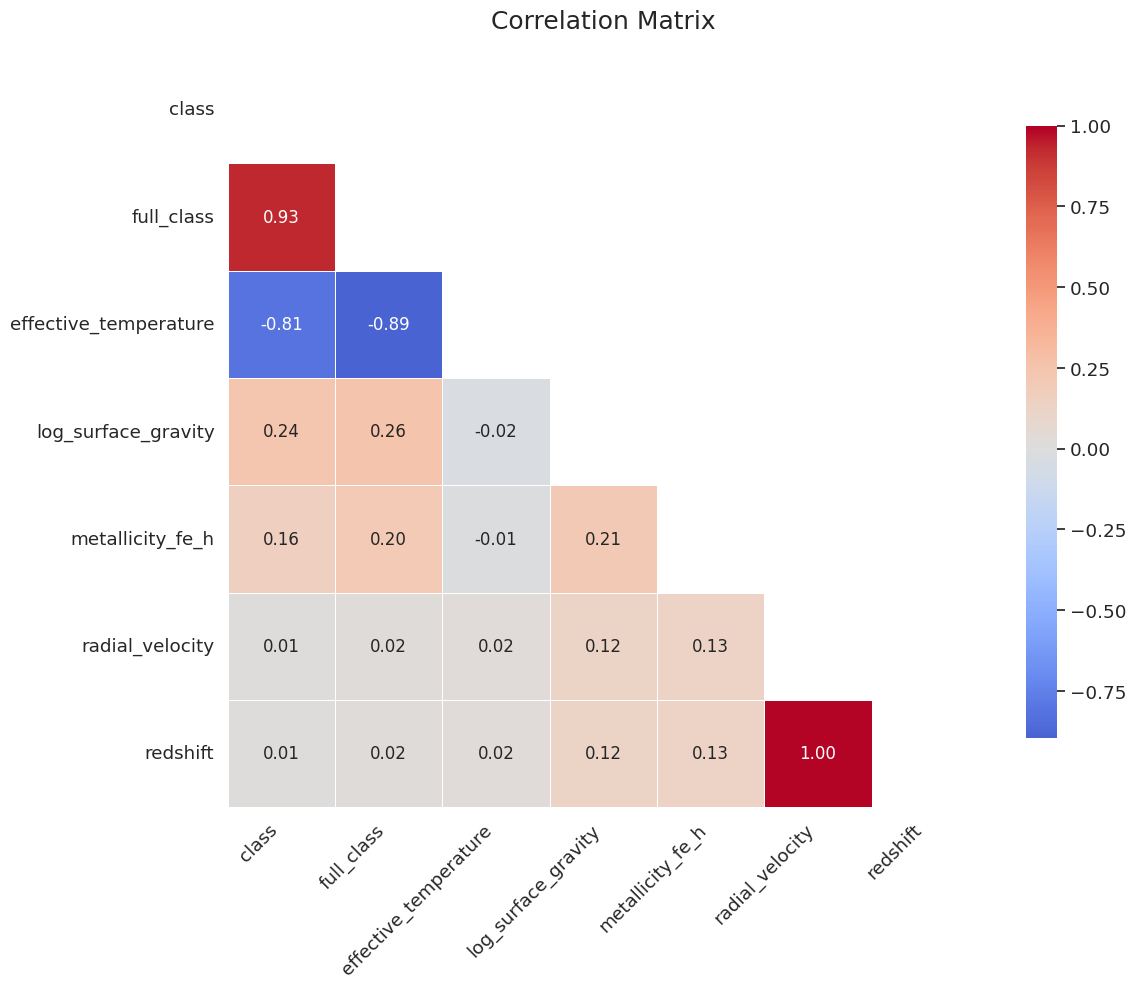

In [12]:
# Set style and context for better aesthetics
sns.set_theme(style="white", font_scale=1.2)
plt.figure(figsize=(12, 10))

# Generate a mask for the upper triangle (optional)
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Create heatmap with custom diverging colormap
heatmap = sns.heatmap(
    corr_matrix,
    mask=mask,                 # Hide upper triangle if desired
    annot=True,                # Show correlation values
    fmt=".2f",                 # Round to 2 decimals
    cmap="coolwarm",           # Blue (negative) -> Red (positive)
    center=0,                  # Center colormap at 0
    square=True,               # Force square cells
    linewidths=0.5,            # Add grid lines
    cbar_kws={"shrink": 0.8},  # Adjust colorbar size
    annot_kws={"size": 12}     # Annotation font size
)

# Improve title and labels
heatmap.set_title("Correlation Matrix", pad=20, fontsize=18)                      # title
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=45, ha='right')       # x-ticks
heatmap.set_yticklabels(heatmap.get_yticklabels(), rotation=0)                    # y-ticks

# Tight layout to avoid cutoff
plt.tight_layout()
plt.show()

Note that the effective temperatures and mass appear to be strongly correlated. This can be further visualized with the following correlation plots:

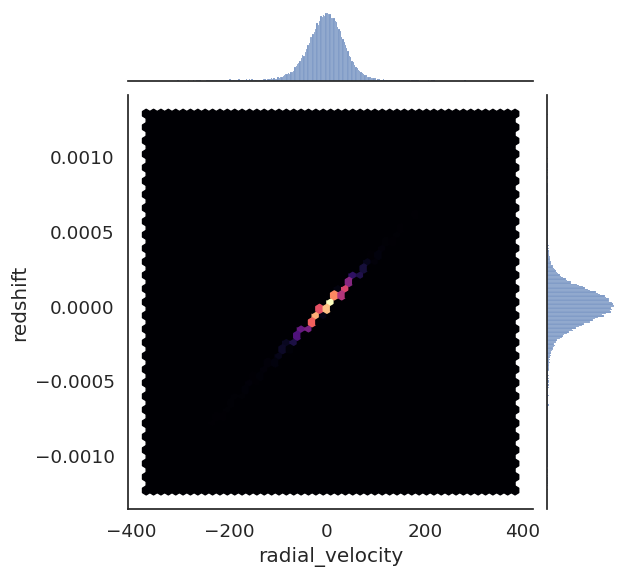

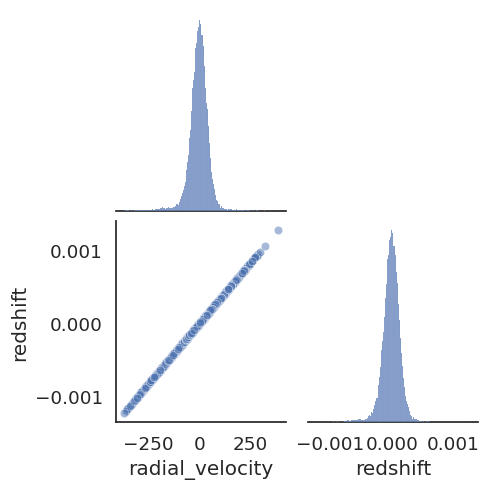

In [13]:
# correlation plots
sns.jointplot(data=df_numeric, x='radial_velocity', y='redshift', kind='hex', cmap='magma')  # Temp1 vs Temp2
plt.show()

# corner plot visualization
sns.pairplot(dfG[['radial_velocity', 'redshift']],  # Selected features
             corner=True,              # Show lower triangle only
             plot_kws={'alpha': 0.5})  # Set transparency

The above analysis shows that the feature that are most correlated with the class and subclass classification is the effective temperature. However, the radial velocity and redshift are strongly correlated, and may lead to redundant information in the resulting analysis.

To conclude this section, we also plot histograms for each one of our relevant variables. We also fit the statistics of the distributions of each quantity, modeled as gaussians. Furthermore, we also check if the different methods to calculate the effective temperatures, surface gravity and metalicity are consistent.

In [14]:
df_numeric.columns

Index(['class', 'full_class', 'effective_temperature', 'log_surface_gravity',
       'metallicity_fe_h', 'radial_velocity', 'redshift'],
      dtype='object')

In [15]:
# Distribution analysis
from scipy.stats import norm, skew, kurtosis
import numpy as np
from scipy import stats

# Initialize results storage
results = {}

# Quantities to analyze 
quantities = ['effective_temperature', 'log_surface_gravity', 
              'metallicity_fe_h', 'radial_velocity', 'redshift']

def get_mode(data):
    """Calculate mode using KDE"""
    kde = stats.gaussian_kde(data.dropna())
    x_eval = np.linspace(data.min(), data.max(), 1000)
    return x_eval[np.argmax(kde(x_eval))]

# Analyze each quantity
for q in quantities:
    data = dfG[q].dropna()
    
    # Skip if no data available
    if len(data) == 0:
        print(f"No data available for {q}")
        continue
    
    # Calculate distribution properties
    results[q] = {
        'mode': get_mode(data),
        'mu': norm.fit(data)[0],
        'std': norm.fit(data)[1],
        'skew': skew(data),
        'kurtosis': kurtosis(data),
        'n_samples': len(data)
    }

# Print results
print("DISTRIBUTION ANALYSIS RESULTS")
print("="*50)
for q in results:
    print(f"\n{q.upper()}:")
    print(f"  Samples: {results[q]['n_samples']}")
    print(f"  Mode: {results[q]['mode']:.3f}")
    print(f"  Gaussian μ: {results[q]['mu']:.3f} ± {results[q]['std']:.3f}")
    print(f"  Skewness: {results[q]['skew']:.3f}")
    print(f"  Kurtosis: {results[q]['kurtosis']:.3f}")

DISTRIBUTION ANALYSIS RESULTS

EFFECTIVE_TEMPERATURE:
  Samples: 50000
  Mode: 5695.035
  Gaussian μ: 5418.996 ± 651.457
  Skewness: -0.253
  Kurtosis: -0.185

LOG_SURFACE_GRAVITY:
  Samples: 50000
  Mode: 4.208
  Gaussian μ: 4.208 ± 0.558
  Skewness: -2.458
  Kurtosis: 7.777

METALLICITY_FE_H:
  Samples: 50000
  Mode: -0.310
  Gaussian μ: -0.319 ± 0.363
  Skewness: -1.159
  Kurtosis: 3.174

RADIAL_VELOCITY:
  Samples: 50000
  Mode: 0.167
  Gaussian μ: -3.851 ± 46.335
  Skewness: -0.874
  Kurtosis: 6.164

REDSHIFT:
  Samples: 50000
  Mode: 0.000
  Gaussian μ: -0.000 ± 0.000
  Skewness: -0.874
  Kurtosis: 6.164


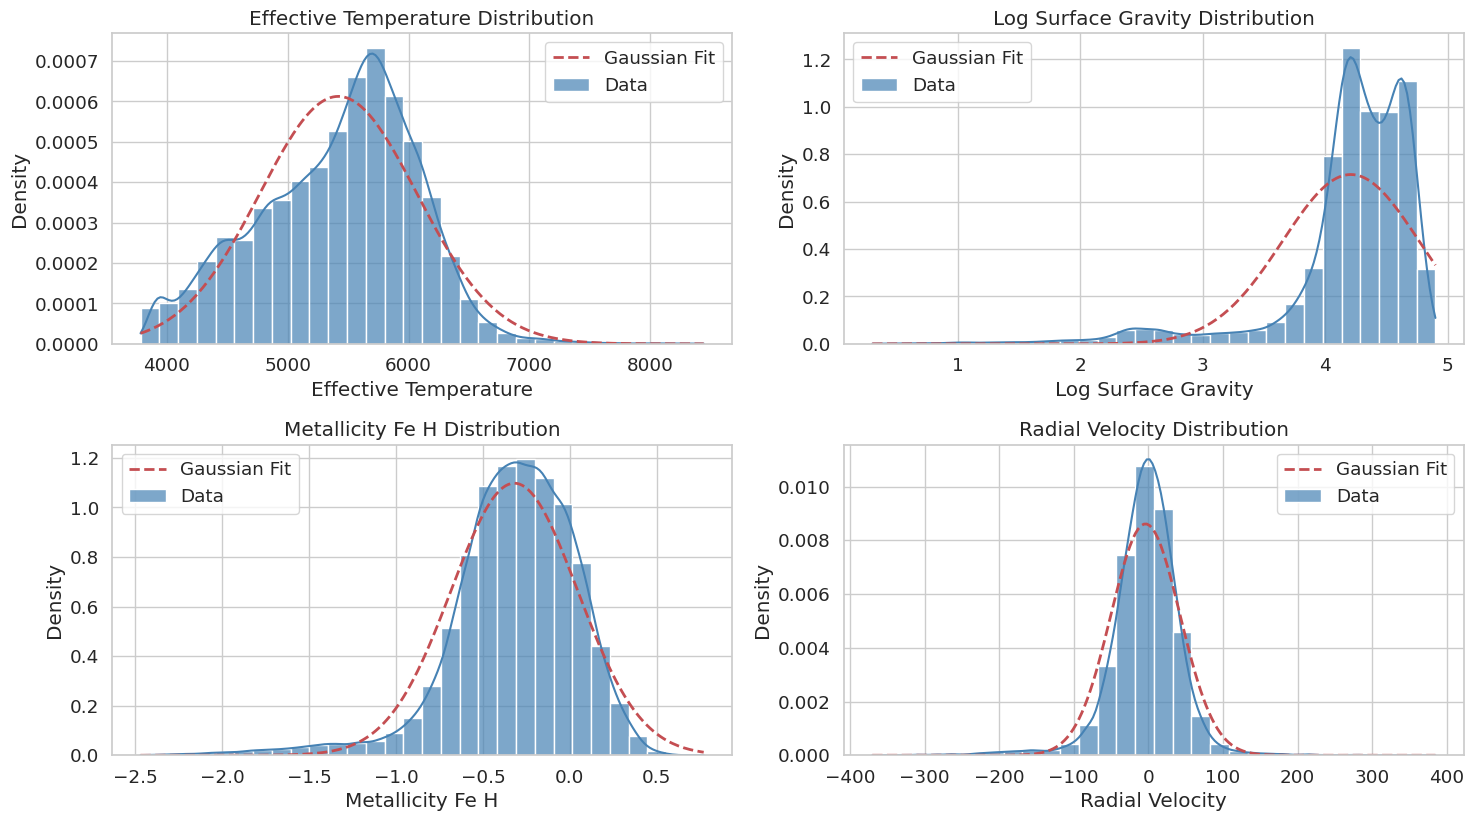

In [16]:
sns.set_style("whitegrid")
plt.figure(figsize=(15, 12))

# Quantities to visualize
quantities = ['effective_temperature', 'log_surface_gravity', 
              'metallicity_fe_h', 'radial_velocity', 'redshift']

# Create subplots (3 rows, 2 columns for 5 quantities)
for i, q in enumerate(quantities, 1):
    plt.subplot(3, 2, i)
    
    # Plot histogram
    sns.histplot(dfG[q].dropna(), color='steelblue', alpha=0.7, 
                 bins=30, stat='density', kde=True, label='Data')
    
    # Plot fitted Gaussian if we have results
    if q in results:
        x_min = dfG[q].min()
        x_max = dfG[q].max()
        x = np.linspace(x_min, x_max, 200)
        gaussian = stats.norm.pdf(x, results[q]['mu'], results[q]['std'])
        plt.plot(x, gaussian, 'r--', linewidth=2, label='Gaussian Fit')
    
    plt.title(f'{q.replace("_", " ").title()} Distribution')
    plt.xlabel(q.replace("_", " ").title())
    plt.ylabel('Density')
    plt.legend()

# Remove empty subplot if odd number of quantities
if len(quantities) % 2 != 0:
    plt.delaxes(plt.gcf().get_axes()[-1])

plt.tight_layout()
plt.show()

The above histograms show that the probability distributions of effective temperature, surface gravity, metallicity, visual magnitude and mass are well described by Gaussian distributions. The luminosity, radius and distance distributions on the other hand are more asymetric, as quantified by their respective kurtosis and skewness coefficients, being therefore not well described by Gaussians. An interesting functional form would be a $\chi^{2}$ distribution, which can be tested in the future if needed. 

# 3. Category Analysis

We now dwelve into the spectral classes and their relation to the effective temperatures. We start by plotting histograms of each class.

In [17]:
# Harvard Classification temperature ranges (in Kelvin) and corresponding spectral classes
# Note: Ranges are non-overlapping with clear boundaries
class_dict = {
    (2300, 3900): 'M',    # 2300K - 3900K
    (3901, 5300): 'K',    # 3901K - 5300K
    (5301, 6000): 'G',    # 5301K - 6000K
    (6001, 7300): 'F',    # 6001K - 7300K
    (7301, 10000): 'A',   # 7301K - 10000K
    (10001, 33000): 'B',  # 10001K - 33000K
    (33001, float('inf')): 'O'  # 33001K and above
}

def temp_to_class(value):
    """Classify a star based on its temperature using Harvard Classification.
    
    Args:
        value (int/float): Temperature in Kelvin
        
    Returns:
        str: Spectral class or error message if temperature is out of range
    """
    # Check for O-class first (handles infinite upper bound)
    if value >= 33001:
        return 'O'
    
    # Check other classes
    for (min_temp, max_temp), spectral_class in class_dict.items():
        if min_temp <= value <= max_temp:
            return spectral_class
    
    # Handle temperatures outside all ranges
    if value < 2300:
        return "Temperature too low for Harvard Classification"
    return "Temperature in gap between defined classes"  # Should never reach here with current class_dict

In [18]:
# Classify effective temperatures and add new column at position n
n = 3  # Set your desired column position here
harvard_classes = dfG['effective_temperature'].dropna().apply(lambda x: temp_to_class(int(x)))
dfG.insert(loc=n, column='harvard_classification', value=harvard_classes)

It is also convenient to count the occurence of each class.

In [81]:
# Count and display class occurrences using Pandas
print("Original class distribution:")
print(dfG['class'].value_counts(dropna=True).to_string())

gold_path = project_root / 'data' / 'gold'
dfG.to_csv(gold_path / 'starG.csv', index=False)
print("\nHarvard classification distribution:")
print(dfG['harvard_classification'].value_counts(dropna=True).to_string())

Original class distribution:
class
G    25133
F    13036
K    11657
A      174

Harvard classification distribution:
harvard_classification
G    21642
K    18981
F     8934
M      331
A      112


The above result shows that the two classifications differ, as illustrated in the plot below.

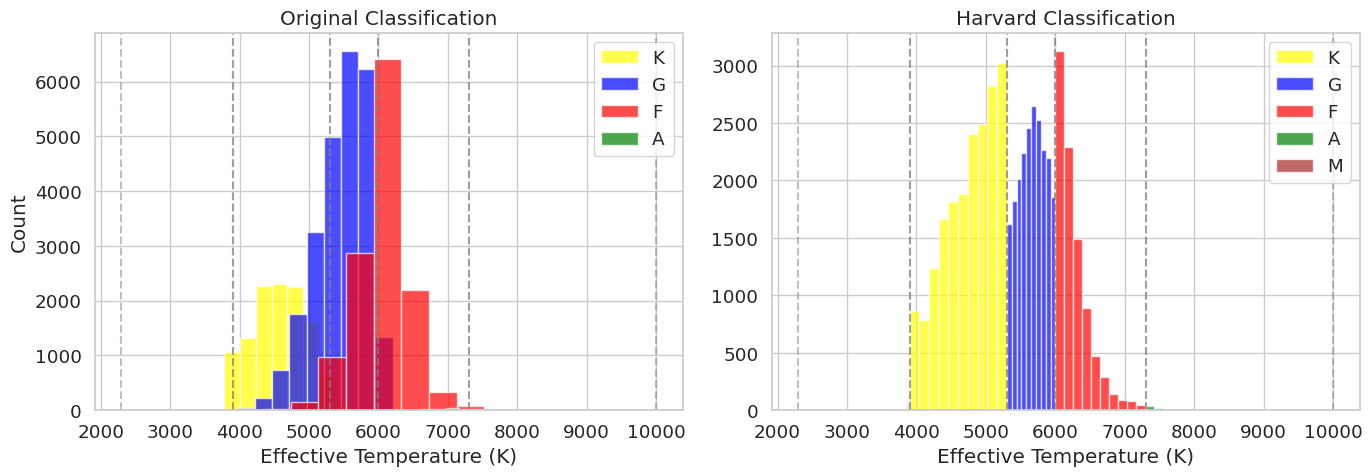

In [20]:
# Create subplots with temperature histograms by existing classes
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Custom color palette (modify as needed)
class_colors = {
    'M': 'brown',
    'K': 'yellow',
    'G': 'blue',
    'F': 'red',
    'A': 'green'
}

# Get existing classes from data
existing_classes = dfG['class'].dropna().unique()
existing_harvard = dfG['harvard_classification'].dropna().unique()

# Class boundaries (in Kelvin)
relevant_borders = {
    'M': [2300, 3900],
    'K': [3900, 5300],
    'G': [5300, 6000],
    'F': [6000, 7300],
    'A': [7300, 10000]
}

# Plot original classes
for cls in existing_classes:
    ax1.hist(dfG[dfG['class'] == cls]['effective_temperature'],
             alpha=0.7, label=cls, color=class_colors[cls])
ax1.set_title('Original Classification')
ax1.set_xlabel('Effective Temperature (K)')
ax1.set_ylabel('Count')
ax1.legend()

# Plot Harvard classes
for cls in existing_harvard:
    ax2.hist(dfG[dfG['harvard_classification'] == cls]['effective_temperature'],
             alpha=0.7, label=cls, color=class_colors[cls])
ax2.set_title('Harvard Classification')
ax2.set_xlabel('Effective Temperature (K)')
ax2.legend()

# Add vertical lines only for existing class boundaries
for cls, borders in relevant_borders.items():
    if cls in existing_classes or cls in existing_harvard:
        for border in borders:
            ax1.axvline(border, color='gray', linestyle='--', alpha=0.5)
            ax2.axvline(border, color='gray', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

We now perform the same analysis for the subclasses.

In [21]:
# Harvard Classification with specific subclasses (temperature ranges in Kelvin)
subclass_dict = {
    (2300, 2400): 'M9', (2401, 2500): 'M8', (2501, 2600): 'M7', 
    (2601, 2700): 'M6', (2701, 2800): 'M5', (2801, 3000): 'M4',
    (3001, 3200): 'M3', (3201, 3400): 'M2', (3401, 3500): 'M1', (3501, 3900): 'M0',
    (3901, 4000): 'K9', (4001, 4100): 'K8', (4101, 4200): 'K7',
    (4201, 4300): 'K6', (4301, 4400): 'K5', (4401, 4500): 'K4',
    (4501, 4600): 'K3', (4601, 4700): 'K2', (4701, 4800): 'K1', (4801, 5300): 'K0',
    (5301, 5400): 'G9', (5401, 5500): 'G8', (5501, 5600): 'G7',
    (5601, 5700): 'G6', (5701, 5800): 'G5', (5801, 5900): 'G4',
    (5901, 6000): 'G3', (6001, 6100): 'G2', (6101, 6200): 'G1', (6201, 7300): 'G0',
    (6001, 6200): 'F9', (6201, 6400): 'F8', (6401, 6600): 'F7',
    (6601, 6800): 'F6', (6801, 7000): 'F5', (7001, 7200): 'F4',
    (7201, 7400): 'F3', (7401, 7600): 'F2', (7601, 7800): 'F1', (7801, 10000): 'F0',
    (7301, 7600): 'A9', (7601, 7900): 'A8', (7901, 8200): 'A7',
    (8201, 8500): 'A6', (8501, 8800): 'A5', (8801, 9100): 'A4',
    (9101, 9400): 'A3', (9401, 9700): 'A2', (9701, 10000): 'A1', (10001, 33000): 'A0',
    (10001, 14000): 'B9', (14001, 18000): 'B8', (18001, 22000): 'B7',
    (22001, 26000): 'B6', (26001, 30000): 'B5', (30001, 33000): 'B4',
    (33001, 36000): 'B3', (36001, 39000): 'B2', (39001, 42000): 'B1', (42001, float('inf')): 'B0',
    (33001, float('inf')): 'O'  # O-type stars typically aren't subdivided
}

def temp_to_subclass(value):
    """Classify a star into specific Harvard subclasses based on temperature.
    
    Args:
        value (int/float): Temperature in Kelvin
        
    Returns:
        str: Specific spectral subclass or error message
    """
    if value >= 33001:
        return 'O'
    
    for (min_temp, max_temp), subclass in subclass_dict.items():
        if min_temp <= value <= max_temp:
            return subclass
    
    if value < 2300:
        return "Too cool"
    return "Unclassified"

# Add subclass column at position 4
dfG.insert(loc=4, column='harvard_subclass', 
           value=dfG['effective_temperature'].apply(lambda x: temp_to_subclass(int(x)) if pd.notna(x) else np.nan))

In histograms, the above becomes

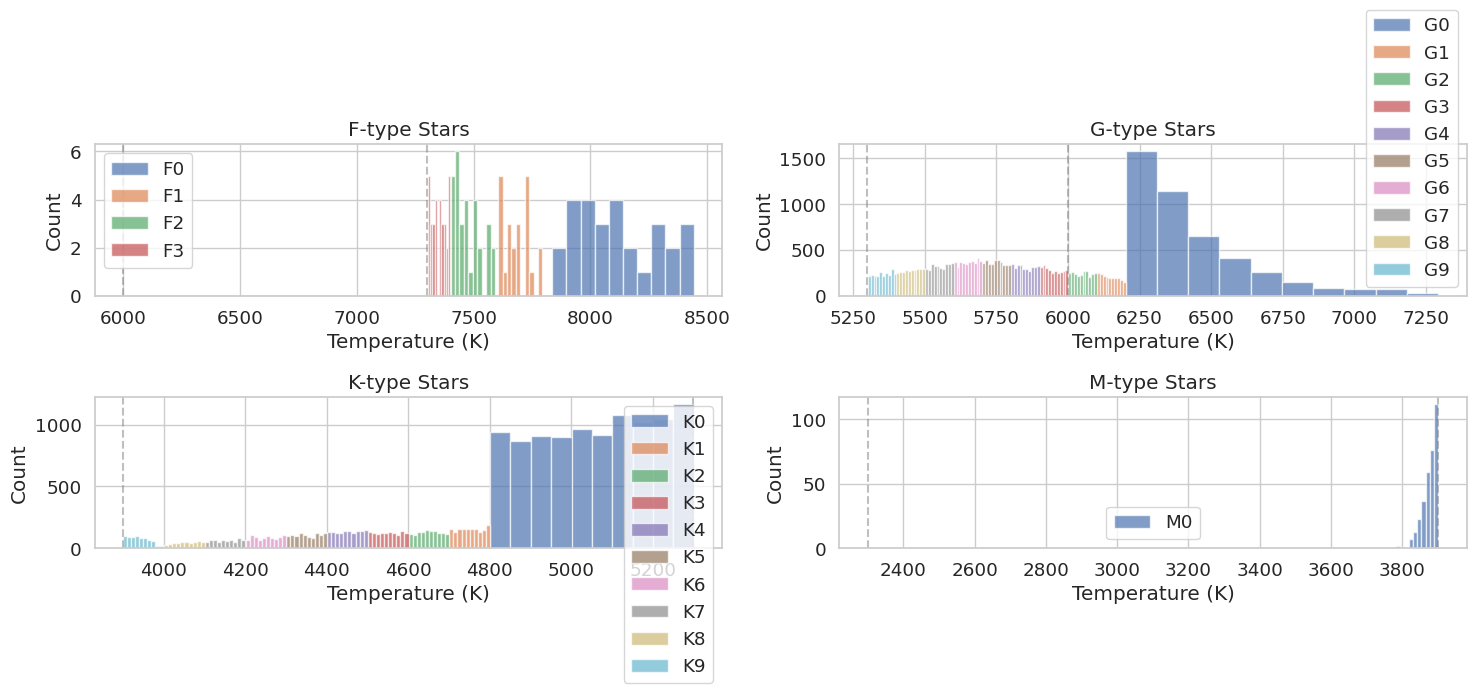

In [22]:
# Get unique main classes (first letter of subclass)
main_classes = sorted({s[0] for s in dfG['harvard_subclass'].dropna().unique()})

# Calculate grid size (2 columns per class)
n_classes = len(main_classes)
n_rows = (n_classes + 1) // 2  # Round up

# Create figure with subplots (2 columns per class)
fig, axes = plt.subplots(n_rows, 2, figsize=(15, 3*n_rows))
axes = axes.flatten()  # Flatten for easy iteration

# Plot each main class in its own subplot
for i, cls in enumerate(main_classes):
    # Get all subclasses for this main class
    subclasses = sorted([s for s in dfG['harvard_subclass'].unique() if str(s)[0] == cls])
    
    # Plot histogram for each subclass
    for subclass in subclasses:
        data = dfG[dfG['harvard_subclass'] == subclass]['effective_temperature']
        axes[i].hist(data, alpha=0.7, label=subclass)
    
    axes[i].set_title(f'{cls}-type Stars')
    axes[i].set_xlabel('Temperature (K)')
    axes[i].set_ylabel('Count')
    axes[i].legend()
    
    # Add class boundaries if defined
    if cls in relevant_borders:
        for border in relevant_borders[cls]:
            axes[i].axvline(border, color='gray', linestyle='--', alpha=0.5)

# Hide any unused axes
for j in range(i+1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

In [23]:
dfG

,identifier,class,full_class,harvard_classification,harvard_subclass,effective_temperature,log_surface_gravity,metallicity_fe_h,radial_velocity,redshift
0,300702165|2015/01/19,K,K4,K,K1,4729.36,4.741,-0.128,42.15,0.000141
1,215109|2011/10/23,G,G8,K,K2,4642.57,4.662,-0.363,36.61,0.000122
2,18112111|2011/12/18,K,K3,K,K2,4664.49,4.690,-0.207,35.04,0.000117
3,367412199|2015/10/07,G,G9,K,K0,4960.44,4.613,-0.262,-35.46,-0.000118
4,18112179|2011/12/18,G,G8,G,G9,5371.04,4.296,-0.248,-29.91,-0.000100
...,...,...,...,...,...,...,...,...,...,...
49995,686002046|2018/10/30,F,F2,F,G2,6061.88,3.811,-0.240,9.94,0.000033
49996,381902037|2015/11/02,F,F2,F,G2,6033.30,4.190,-0.458,35.12,0.000117
49997,381902043|2015/11/02,G,G9,K,K0,5066.79,3.210,-0.247,-26.94,-0.000090
49998,254204018|2014/10/14,G,G7,G,G7,5571.65,4.073,0.435,1.68,0.000006
